In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def model(theta, x):
    """
    theta: (m,) 或标量
    x: (4,) 参数向量 [x1, x2, x3, x4]
    返回: f(theta; x)，形状与 theta 相同
    """
    x1, x2, x3, x4 = x
    return x1 * np.exp(x2 * theta) * np.cos(x3 * theta + x4)

In [5]:
def model_grad(theta, x):
    """
    对 x 的梯度（单样本），返回形状 (4,)
    """
    x1, x2, x3, x4 = x
    e = np.exp(x2 * theta)
    c = np.cos(x3 * theta + x4)
    s = np.sin(x3 * theta + x4)
    df_dx1 = e * c
    df_dx2 = x1 * theta * e * c
    df_dx3 = -x1 * theta * e * s
    df_dx4 = -x1 * e * s
    return np.array([df_dx1, df_dx2, df_dx3, df_dx4], dtype=float)

In [6]:
def cost(x, thetas, y):
    """
    平均平方误差 cost = ||f(t; x) - y||^2 / m
    """
    r = model(thetas, x) - y
    return (r @ r) / thetas.size

In [7]:
def sgd_grad(x, thetas, y, rng):
    """
    抽一个样本，返回随机梯度（与课件 gradg1 相同）
    """
    m = thetas.size
    i = rng.integers(0, m)              # randi([1,m]) 的 0-based 版本
    ti, yi = thetas[i], y[i]
    r = model(ti, x) - yi
    return 2.0 * r * model_grad(ti, x)

In [9]:
rng = np.random.default_rng(666)
# 真参数（课件 xt）
x_true = np.array([1.0, 2.0, np.pi, 0.0])

# 采样自变量（课件 tm）
thetas = np.arange(-1.0, 1.0 + 1e-9, 0.001)  # [-1:0.001:1]
m = thetas.size

# 生成“真”观测（课件 ft / fn）
y = model(thetas, x_true)
# 如需加噪声可取消注释：y = y + 0.01 * rng.standard_normal(m)

# 初始点（课件 x0）
x0 = np.array([1.0, 1.0, 1.0, 1.0])

In [10]:
def run_sgd(eta, maxiter=10_000, seed=1234):
    rng_local = np.random.default_rng(seed)
    x = x0.copy()
    hist = [cost(x, thetas, y)]
    for _ in range(maxiter):
        g = sgd_grad(x, thetas, y, rng_local)
        x = x - eta * g
        hist.append(cost(x, thetas, y))
    return np.array(hist), x

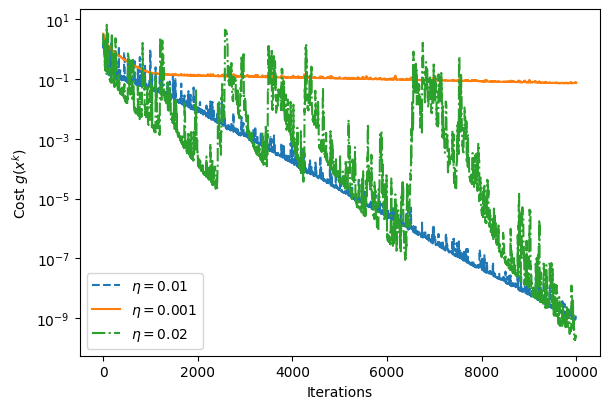

In [11]:
# 三个学习率的对比（复现课件图 8 的风格）
lrs = [0.01, 0.001, 0.02]
labels = [r'$\eta=0.01$', r'$\eta=0.001$', r'$\eta=0.02$']
styles = ['--', '-', '-.']

plt.figure(figsize=(6.2, 4.2))
for eta, lab, st in zip(lrs, labels, styles):
    hist, x_hat = run_sgd(eta)
    plt.semilogy(hist, st, label=lab)
plt.xlabel('Iterations')
plt.ylabel(r'Cost $g(x^k)$')
plt.legend()
plt.tight_layout()
plt.show()